In [2]:
import math
import numpy as np 
import matplotlib.pyplot as plt 
from numpy import random 
from scipy import linalg
from scipy.sparse.linalg import eigs
from scipy.sparse.linalg import eigsh
import sys
import matplotlib.animation as animation
np.set_printoptions(threshold=sys.maxsize)
import time

In [3]:
N = 50
dx = 4/N
x = 0.6
y = 1.2

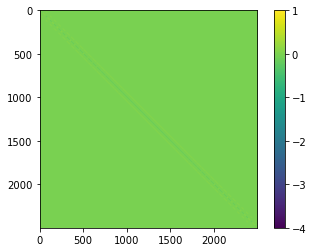

In [4]:
def matrix(N,dx,x,y):
    '''
    matrix sets up the matrix for the diffusion function for a circle with a source at (x,y)
    Arg:
    - N: the number of steps in the discretized space
    - dx: the length of one step in discretized space
    - x: the x coordinate of the source
    - y: the y coordinate of the source
    Out:
    - The matrix of a discretized diffusion equation
    
    '''
    
    matrix = np.zeros((N**2,N**2))
    i = 0
    for row in matrix:
        row[i] = -4
        if i >= N:
            row[i-N] = 1
        if i < (N-1)*N:
            row[i+N] = 1
        if (i+1)%N !=1:
            row[i-1] = 1
        if (i+1)%N !=0:
            row[i+1] = 1
        i = i+1                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                    
    dist_list = np.array([])
    for i in range(N):
        a = (i+0.5) * dx - 2
        for j in range(N):
            b = (j+0.5) * dx - 2
            dist = np.sqrt(a**2 + b**2)
            dist_list = np.append(dist_list, dist)
    change_list = dist_list > 2
    for i in range(len(change_list)):
        if change_list[i]:
            matrix[:, i] = 0
            matrix[i, :] = 0
    i = 0
    for row in matrix:
        if row[i] != -4:
            row[i] = 1
        i+=1
    b = np.zeros((N, N))
    k = int(math.floor((2+x) /dx))
    l = int(math.floor((2-y) /dx))
    b[l,k] = 1
    b = np.reshape(b, (N*N))
    S = np.argmax(b)
    Sourcerow = np.zeros(N*N)
    Sourcerow[S] = 1
    matrix[S] = Sourcerow
    return b, matrix

b, M = matrix(N,dx,x,y)
colormap = plt.imshow(M, cmap='viridis')
plt.colorbar()
plt.show()

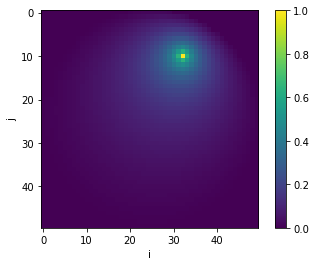

In [6]:
c = linalg.solve(M,b)
C = np.reshape(c, (N,N))
colormap = plt.imshow(C, cmap='viridis')
plt.colorbar()
plt.xlabel('i')
plt.ylabel('j')
plt.show()